In [144]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import metrics
from sklearn.decomposition import PCA
import plotly.figure_factory as ff

In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import pickle

In [1]:
output_path = "/data/projects/Tissue_specific_data/clustering/results/2.5"

In [61]:
df = pd.read_csv("/data/projects/Tissue_specific_data/clustering/2.5.csv")
df = df.set_index('tissue')

In [65]:
df

,ENST00000494424.1,ENST00000612152.4,ENST00000371584.8,ENST00000413082.1,ENST00000494752.1,ENST00000423670.1,ENST00000470238.1,ENST00000286031.10,ENST00000359326.8,ENST00000413811.3,...,ENST00000639047.1,ENST00000639741.1,ENST00000640157.1,ENST00000640623.1,ENST00000640630.1,ENST00000638486.1,ENST00000408734.1,ENST00000385204.1,ENST00000583027.1,ENST00000638236.1
tissue,,,,,,,,,,,,,,,,,,,,,
Adipose_Tissue,0.000000,0.004983,0.044020,0.000831,0.000000,0.000831,0.000000,0,0.000831,0.000831,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000831,0.009136,0.003322,0.000000
Adrenal_Gland,0.000000,0.000000,0.054264,0.000000,0.007752,0.000000,0.000000,0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011628,0.000000
Bladder,0.000000,0.000000,0.095238,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857
Blood,0.000000,0.000000,0.111948,0.000000,0.000000,0.001076,0.009688,0,0.045210,0.072121,...,0.038751,0.012917,0.049516,0.062433,0.004306,0.026911,0.000000,0.043057,0.002153,0.000000
Blood_Vessel,0.000000,0.000000,0.045693,0.002996,0.000000,0.000000,0.001498,0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005993,0.087640
Brain,0.000000,0.001136,0.010220,0.000379,0.001893,0.000000,0.000000,0,0.000000,0.046177,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000379,0.000757,0.009463,0.000000
Breast,0.000000,0.013072,0.032680,0.000000,0.000000,0.000000,0.019608,0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004357,0.002179,0.000000
Cervix_Uteri,0.000000,0.052632,0.210526,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,...,0.105263,0.000000,0.105263,0.105263,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Colon,0.000000,0.052632,0.023107,0.000000,0.000000,0.001284,0.000000,0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002567,0.000000,0.155327


In [66]:
temp = df[df >= 0.7].count()
temp

ENST00000494424.1    1
ENST00000612152.4    1
ENST00000371584.8    0
ENST00000413082.1    0
ENST00000494752.1    0
                    ..
ENST00000638486.1    0
ENST00000408734.1    0
ENST00000385204.1    0
ENST00000583027.1    0
ENST00000638236.1    0
Length: 99256, dtype: int64

In [67]:
df_temp = pd.DataFrame(temp.value_counts(), columns=['Number of Transcript']).reset_index()

In [68]:
df_temp.rename(columns = {'index':'Number of Tissue'}, inplace = True)
df_temp = df_temp.sort_values(['Number of Tissue'], ascending=True)
df_temp

,Number of Tissue,Number of Transcript
0,0,85179
1,1,8880
3,2,586
5,3,146
8,4,41
10,5,10
11,6,6
15,21,1
14,23,1
13,24,2


In [69]:
temp[temp==30]

ENST00000341376.10    30
ENST00000309032.7     30
ENST00000606142.5     30
ENST00000381187.8     30
ENST00000381192.8     30
                      ..
ENST00000631211.1     30
ENST00000627981.1     30
ENST00000632506.1     30
ENST00000634247.1     30
ENST00000636484.1     30
Length: 3671, dtype: int64

In [70]:
df['ENST00000341376.10']

tissue
Adipose_Tissue     0.999169
Adrenal_Gland      1.000000
Bladder            1.000000
Blood              0.737352
Blood_Vessel       0.994757
Brain              0.963664
Breast             1.000000
Cervix_Uteri       1.000000
Colon              0.996149
Esophagus          0.994464
Fallopian_Tube     1.000000
Heart              0.715447
Kidney             0.876404
Liver              0.871681
Lung               1.000000
Muscle             0.830635
Nerve              1.000000
Ovary              1.000000
Pancreas           0.740854
Pituitary          1.000000
Prostate           1.000000
Salivary_Gland     1.000000
Skin               0.997789
Small_Intestine    1.000000
Spleen             1.000000
Stomach            0.955432
Testis             1.000000
Thyroid            1.000000
Uterus             1.000000
Vagina             0.993590
Name: ENST00000341376.10, dtype: float64

In [128]:
dfs = []
for i in range(31):
    dfs.append(pd.DataFrame(columns= ['Transcript ID', 'Tissue List']))
for col in df.columns:
    tissue_list = df[df[col]>=0.7].index.tolist()
    tissue_number = len(tissue_list)
    len_df = len(dfs[tissue_number])
    dfs[tissue_number].at[len_df+1, 'Transcript ID'] = col
    dfs[tissue_number].at[len_df+1, 'Tissue List'] = str(tissue_list)

In [129]:
dfs[30]

,Transcript ID,Tissue List
1,ENST00000341376.10,"['Adipose_Tissue', 'Adrenal_Gland', 'Bladder',..."
2,ENST00000309032.7,"['Adipose_Tissue', 'Adrenal_Gland', 'Bladder',..."
3,ENST00000606142.5,"['Adipose_Tissue', 'Adrenal_Gland', 'Bladder',..."
4,ENST00000381187.8,"['Adipose_Tissue', 'Adrenal_Gland', 'Bladder',..."
5,ENST00000381192.8,"['Adipose_Tissue', 'Adrenal_Gland', 'Bladder',..."
...,...,...
3667,ENST00000631211.1,"['Adipose_Tissue', 'Adrenal_Gland', 'Bladder',..."
3668,ENST00000627981.1,"['Adipose_Tissue', 'Adrenal_Gland', 'Bladder',..."
3669,ENST00000632506.1,"['Adipose_Tissue', 'Adrenal_Gland', 'Bladder',..."
3670,ENST00000634247.1,"['Adipose_Tissue', 'Adrenal_Gland', 'Bladder',..."


In [131]:
for i in range(31):
    dfs[i].to_csv(output_path+"/"+"Transcript_with_tissue_{}.csv".format(i), index=False)

## Important Transcripts for Clustering

In [133]:
transcript_list = []
for k in [2,3,4, 5, 6]:
    df_temp = pd.read_csv(output_path+"/"+"Transcript_with_tissue_{}.csv".format(k))
    transcript_list.extend(df_temp['Transcript ID'].tolist())

In [134]:
len(transcript_list)

789

In [135]:
df_clustering = df[transcript_list]
df_clustering

,ENST00000180173.9,ENST00000491437.1,ENST00000379672.9,ENST00000397193.7,ENST00000295987.12,ENST00000340666.5,ENST00000631086.2,ENST00000314214.12,ENST00000544137.5,ENST00000612884.4,...,ENST00000486996.5,ENST00000542590.1,ENST00000413472.5,ENST00000482108.1,ENST00000480939.1,ENST00000310624.6,ENST00000332129.6,ENST00000528712.5,ENST00000554276.1,ENST00000620211.1
tissue,,,,,,,,,,,,,,,,,,,,,
Adipose_Tissue,0.024086,0.017442,0.000000,0.056478,0.002492,0.040698,0.009136,0.000831,0.004153,0.000000,...,0.006645,0.130399,0.004983,0.004983,0.008306,0.003322,0.056478,0.003322,0.014950,0.108804
Adrenal_Gland,0.011628,0.058140,0.007752,0.120155,0.046512,0.100775,0.000000,0.000000,0.069767,0.000000,...,0.038760,0.003876,0.000000,0.996124,0.003876,0.992248,0.000000,0.031008,0.914729,0.027132
Bladder,0.000000,0.000000,0.000000,0.047619,0.000000,0.047619,0.142857,0.000000,0.000000,0.000000,...,0.000000,0.190476,0.000000,0.095238,0.000000,0.000000,0.047619,0.000000,0.000000,0.761905
Blood,0.000000,0.000000,0.000000,0.892357,0.002153,0.007535,0.000000,0.006459,0.093649,0.001076,...,0.000000,0.986006,0.000000,0.095802,0.002153,0.053821,0.908504,0.002153,0.000000,0.000000
Blood_Vessel,0.035206,0.085393,0.005243,0.012734,0.000000,0.026217,0.111610,0.015730,0.002996,0.000749,...,0.152060,0.053184,0.847940,0.029213,0.012734,0.003745,0.020225,0.181273,0.023221,0.130337
Brain,0.758516,0.194550,0.725587,0.001514,0.895155,0.956851,0.008327,0.011355,0.731264,0.000000,...,0.033687,0.001136,0.250568,0.732778,0.939061,0.874716,0.818698,0.000379,0.001136,0.000379
Breast,0.000000,0.061002,0.002179,0.015251,0.000000,0.000000,0.006536,0.010893,0.004357,0.000000,...,0.145969,0.061002,0.006536,0.063181,0.034858,0.008715,0.028322,0.000000,0.115468,0.030501
Cervix_Uteri,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,...,0.052632,0.157895,0.000000,0.052632,0.052632,0.000000,0.000000,0.000000,0.052632,0.842105
Colon,0.000000,0.106547,0.000000,0.020539,0.019255,0.065469,0.102696,0.000000,0.037227,0.000000,...,0.001284,0.222080,0.003851,0.083440,0.000000,0.075738,0.137356,0.006418,0.024390,0.898588


In [137]:
df_clustering.to_csv("/data/projects/Tissue_specific_data/clustering/df_clustering.csv", index=False)

## Kmeans clustering 

In [139]:
sil_list = []
for k in range(2,7):
    print(k)
    cluster = KMeans(n_clusters=k).fit(df_clustering)
    labels = cluster.labels_
    sil_score = metrics.silhouette_score(df_clustering, labels)
    sil_list.append(sil_score)
    print("Silhoutte Score: ",sil_score)
    for i in range(k):
        index_cluster=np.where(labels==i) # get indexes of points in cluster 0 
        print("Tissues in cluster_{}:".format(i), df_clustering.index[index_cluster].tolist())
    
    print("\n\n")

2
Silhoutte Score:  0.46973591078920074
Tissues in cluster_0: ['Adipose_Tissue', 'Adrenal_Gland', 'Bladder', 'Blood', 'Blood_Vessel', 'Breast', 'Cervix_Uteri', 'Colon', 'Esophagus', 'Fallopian_Tube', 'Heart', 'Kidney', 'Liver', 'Lung', 'Muscle', 'Nerve', 'Ovary', 'Pancreas', 'Prostate', 'Salivary_Gland', 'Skin', 'Small_Intestine', 'Spleen', 'Stomach', 'Thyroid', 'Uterus', 'Vagina']
Tissues in cluster_1: ['Brain', 'Pituitary', 'Testis']



3
Silhoutte Score:  0.39818979760769185
Tissues in cluster_0: ['Adipose_Tissue', 'Adrenal_Gland', 'Bladder', 'Blood', 'Blood_Vessel', 'Breast', 'Cervix_Uteri', 'Colon', 'Esophagus', 'Fallopian_Tube', 'Kidney', 'Liver', 'Lung', 'Nerve', 'Ovary', 'Pancreas', 'Prostate', 'Salivary_Gland', 'Skin', 'Small_Intestine', 'Spleen', 'Stomach', 'Thyroid', 'Uterus', 'Vagina']
Tissues in cluster_1: ['Brain', 'Pituitary', 'Testis']
Tissues in cluster_2: ['Heart', 'Muscle']



4
Silhoutte Score:  0.4116364379516166
Tissues in cluster_0: ['Adipose_Tissue', 'Adrenal_Gl

## Hierarchical Clustering

In [143]:
linkage_style= "average"

for k in range(2,7):
    agglomerative = AgglomerativeClustering(n_clusters=i, linkage=linkage_style, affinity='euclidean')
    hier_cluster = AgglomerativeClustering().fit(df_clustering)
    hlabels = hier_cluster.labels_ 
    score = metrics.silhouette_score(df_clustering,hlabels)
    print ("Silhouette Score", score)
    for i in range(k):
        index_cluster=np.where(hlabels==i) # get indexes of points in cluster 0 
        print("Tissues in cluster_{}:".format(i), df_clustering.index[index_cluster].tolist())
    
    print("\n\n")

Silhouette Score 0.46973591078920074
Tissues in cluster_0: ['Adipose_Tissue', 'Adrenal_Gland', 'Bladder', 'Blood', 'Blood_Vessel', 'Breast', 'Cervix_Uteri', 'Colon', 'Esophagus', 'Fallopian_Tube', 'Heart', 'Kidney', 'Liver', 'Lung', 'Muscle', 'Nerve', 'Ovary', 'Pancreas', 'Prostate', 'Salivary_Gland', 'Skin', 'Small_Intestine', 'Spleen', 'Stomach', 'Thyroid', 'Uterus', 'Vagina']
Tissues in cluster_1: ['Brain', 'Pituitary', 'Testis']



Silhouette Score 0.46973591078920074
Tissues in cluster_0: ['Adipose_Tissue', 'Adrenal_Gland', 'Bladder', 'Blood', 'Blood_Vessel', 'Breast', 'Cervix_Uteri', 'Colon', 'Esophagus', 'Fallopian_Tube', 'Heart', 'Kidney', 'Liver', 'Lung', 'Muscle', 'Nerve', 'Ovary', 'Pancreas', 'Prostate', 'Salivary_Gland', 'Skin', 'Small_Intestine', 'Spleen', 'Stomach', 'Thyroid', 'Uterus', 'Vagina']
Tissues in cluster_1: ['Brain', 'Pituitary', 'Testis']
Tissues in cluster_2: []



Silhouette Score 0.46973591078920074
Tissues in cluster_0: ['Adipose_Tissue', 'Adrenal_Gland', 

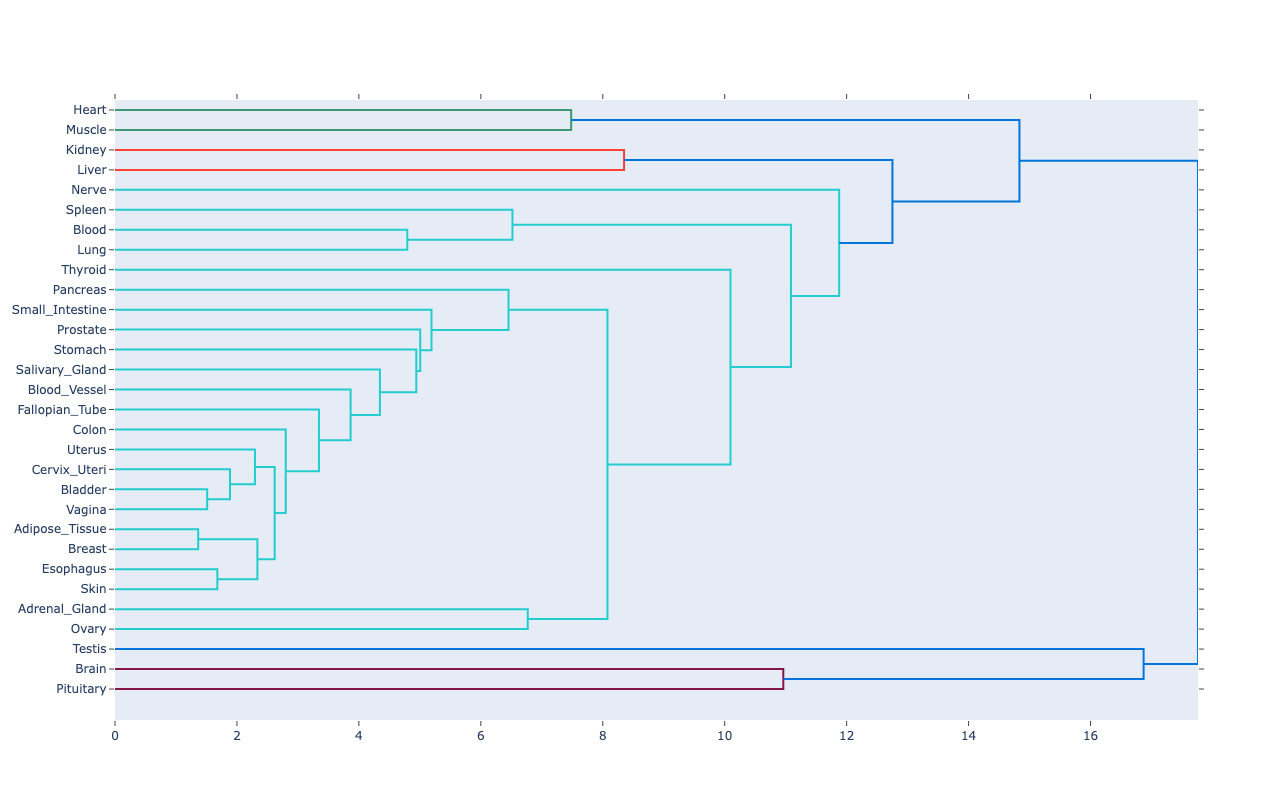

In [148]:
names = df_clustering.index.tolist()
fig = ff.create_dendrogram(df_clustering, orientation='left', labels=names)
fig.update_layout(width=800, height=800)
fig.show()

## Tissue remaining 

In [75]:
temp_rem = (df.lt(0.7) & df.gt(0.3)).sum()
temp_rem

ENST00000494424.1    0
ENST00000612152.4    0
ENST00000371584.8    0
ENST00000413082.1    0
ENST00000494752.1    0
                    ..
ENST00000638486.1    0
ENST00000408734.1    0
ENST00000385204.1    0
ENST00000583027.1    0
ENST00000638236.1    0
Length: 99256, dtype: int64

In [76]:
df_temp_rem = pd.DataFrame(temp_rem.value_counts(), columns=['Number of Transcript']).reset_index()
df_temp_rem.rename(columns = {'index':'Number of Tissue'}, inplace = True)
df_temp_rem = df_temp_rem.sort_values(['Number of Tissue'], ascending=True)
df_temp_rem

,Number of Tissue,Number of Transcript
0,0,99256


## Tissue enhanced

In [62]:
df

,ENST00000494424.1,ENST00000612152.4,ENST00000371584.8,ENST00000413082.1,ENST00000494752.1,ENST00000423670.1,ENST00000470238.1,ENST00000286031.10,ENST00000359326.8,ENST00000413811.3,...,ENST00000639047.1,ENST00000639741.1,ENST00000640157.1,ENST00000640623.1,ENST00000640630.1,ENST00000638486.1,ENST00000408734.1,ENST00000385204.1,ENST00000583027.1,ENST00000638236.1
tissue,,,,,,,,,,,,,,,,,,,,,
Adipose_Tissue,0.000000,0.004983,0.044020,0.000831,0.000000,0.000831,0.000000,0,0.000831,0.000831,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000831,0.009136,0.003322,0.000000
Adrenal_Gland,0.000000,0.000000,0.054264,0.000000,0.007752,0.000000,0.000000,0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011628,0.000000
Bladder,0.000000,0.000000,0.095238,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857
Blood,0.000000,0.000000,0.111948,0.000000,0.000000,0.001076,0.009688,0,0.045210,0.072121,...,0.038751,0.012917,0.049516,0.062433,0.004306,0.026911,0.000000,0.043057,0.002153,0.000000
Blood_Vessel,0.000000,0.000000,0.045693,0.002996,0.000000,0.000000,0.001498,0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005993,0.087640
Brain,0.000000,0.001136,0.010220,0.000379,0.001893,0.000000,0.000000,0,0.000000,0.046177,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000379,0.000757,0.009463,0.000000
Breast,0.000000,0.013072,0.032680,0.000000,0.000000,0.000000,0.019608,0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004357,0.002179,0.000000
Cervix_Uteri,0.000000,0.052632,0.210526,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,...,0.105263,0.000000,0.105263,0.105263,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Colon,0.000000,0.052632,0.023107,0.000000,0.000000,0.001284,0.000000,0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002567,0.000000,0.155327


In [63]:
# import pandas as pd

# # Example DataFrame
# df = pd.DataFrame({
#     'col1': [0.1, 0.8, 0.2, 0.3],
#     'col2': [0.2, 0.9, 0.1, 0.1],
#     'col3': [0.3, 0.2, 0.1, 0.2],
#     'col4': [0.6, 0.7, 0.8, 0.9],
#     'col5': [0.05, 0.12, 0.1, 0.2]
# })

# Select columns where exactly one row is > 0.7 and all others are < 0.3
enhanced_cols = []
for col in df.columns:
    values = df[col]
    values = values[values<0.7]
    if (len(values) < len(df)):
        if all(values < 0.3):
            enhanced_cols.append(col)
            
print(enhanced_cols)

['ENST00000494424.1', 'ENST00000612152.4', 'ENST00000413811.3', 'ENST00000341376.10', 'ENST00000486698.1', 'ENST00000422867.1', 'ENST00000435873.1', 'ENST00000450723.5', 'ENST00000394507.5', 'ENST00000309032.7', 'ENST00000606142.5', 'ENST00000381187.8', 'ENST00000381192.8', 'ENST00000624481.4', 'ENST00000471527.1', 'ENST00000318008.10', 'ENST00000419929.1', 'ENST00000435347.7', 'ENST00000000412.7', 'ENST00000541507.5', 'ENST00000339809.10', 'ENST00000446305.1', 'ENST00000447326.5', 'ENST00000264276.10', 'ENST00000309955.7', 'ENST00000417013.5', 'ENST00000419278.2', 'ENST00000439218.5', 'ENST00000455230.5', 'ENST00000469831.1', 'ENST00000347869.7', 'ENST00000475590.5', 'ENST00000180173.9', 'ENST00000000233.9', 'ENST00000540200.5', 'ENST00000373449.6', 'ENST00000502843.5', 'ENST00000001008.5', 'ENST00000454079.5', 'ENST00000004982.5', 'ENST00000007516.7', 'ENST00000005178.5', 'ENST00000368919.7', 'ENST00000434949.5', 'ENST00000460159.1', 'ENST00000231749.7', 'ENST00000443080.5', 'ENST000

In [64]:
len(enhanced_cols)

14074